# Covid-19 Pandemic in INDIA

The COVID-19 pandemic in India is part of the worldwide pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first case of COVID-19 in India, which originated from China, was reported on 30 January 2020. India currently has the largest number of confirmed cases in Asia, and, as of March 2021, has the third-highest number of confirmed cases in the world after the United States and Brazil with more than 11.4 million reported cases of COVID-19 infection and more than 158,000 deaths as of March 15, 2021. The per day cases peaked mid-September in India with over 90,000 cases reported per day and have since come down to below 15,000 as of 2021 January.

In July 2020, India's Ministry of Information and Broadcasting claimed the country's case fatality rate was among the lowest in the world at 2.41% and "steadily declining". By mid-May 2020, seven cities accounted for around half of all reported cases in the country – Mumbai, Delhi, Ahmedabad, Chennai, Pune and Kolkata. The last region to report its first case was Lakshadweep, on 19 January 2021, nearly a year after the first reported case in India. On 10 June, India's recoveries exceeded active cases for the first time. Infection rates started to drop significantly in September, and the number of daily new cases and active cases started to decline rapidly. A Government panel on COVID-19 announced in October that the pandemic had peaked in India, and may come under control by February 2021. This prediction was based on a mathematical simulation assuming than India reaches herd immunity, the so called "Indian Supermodel". A comparison of the predicted and actual cases is available on its homepage. In a paper on an improved simulation model published February 2021 the same authors estimate the immunity of the Indian population to be close to 60% and claim that India might be the only major economy that has successfully implemented a herd immunity strategy.India has over 30 anti-COVID vaccines in various stages of development and a national vaccination drive was started on 16 January 2021.India began the world's largest Covid vaccination drive on January 16 and in 18 days the country has successfully vaccinated over 4.1 million healthcare workers.


**Source:** Wikipedia

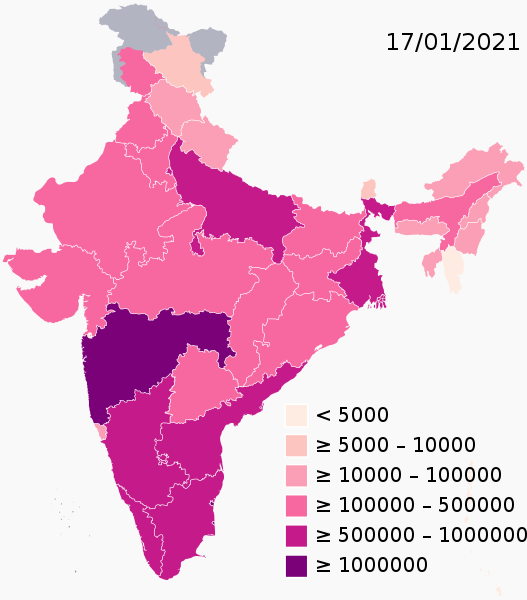

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from matplotlib import pyplot
import warnings; warnings.simplefilter('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
covid19_df = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
Testing = pd.read_csv("../input/covid19-in-india/StatewiseTestingDetails.csv")

In [ ]:
covid19_df.head()

In [ ]:
covid19_df.tail()

In [ ]:
covid19_df.shape

In [ ]:
Testing.head()

# Data Cleaning

In [ ]:
Testing.isnull().sum()

In [ ]:
Testing.Negative = Testing.Negative.fillna('0')
Testing.Positive = Testing.Positive.fillna('0')

In [ ]:
Testing.head()

In [ ]:
covid19_df.tail()

In [ ]:
covid19_df.shape

In [ ]:
covid19_df.isnull().sum()

In [ ]:
covid19_df['State/UnionTerritory'].unique()

In [ ]:
covid19_df.rename(columns={'State/UnionTerritory':'State'},inplace=True)

In [ ]:
covid19_df

In [ ]:
covid19_df['State'].unique()

In [ ]:
covid19_df=covid19_df.replace('Telengana','Telangana')
covid19_df=covid19_df.replace('Telengana***','Telangana')
covid19_df=covid19_df.replace('Telangana***','Telangana')
covid19_df=covid19_df.replace('Maharashtra***','Maharashtra')
covid19_df=covid19_df.replace('Chandigarh***','Chandigarh')
covid19_df=covid19_df.replace('Punjab***','Punjab')

In [ ]:
dropn_indexnames =covid19_df[(covid19_df['State'] == 'Cases being reassigned to states')].index 
covid19_df.drop(dropn_indexnames,inplace=True)

In [ ]:
covid19_df['State'].unique()

In [ ]:
covid19_df.isnull().sum()

In [ ]:
Testing.isnull().sum()

In [ ]:
covid19_df.describe()

In [ ]:
df = covid19_df.tail(35) ## Extract most recent date's info & data
df1 = df.sort_values(by='Confirmed', ascending=False).head(10)

In [ ]:
Testing = Testing.astype({'Positive': 'int32'})

In [ ]:
Testing.dtypes

In [ ]:
covid19_df_latest=covid19_df[covid19_df['Date']=='01/07/20']

In [ ]:
covid19_df_latest.head()

In [ ]:
covid19_df_latest['Confirmed'].sum()

# **OVERVIEW IN NUMBERS IN INDIA(STATEWISE)**

In [ ]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Confirmed'],ascending = False)
plt.figure(figsize=(15,10),dpi = 80)
plt.bar(covid19_df_latest['State'][:5],covid19_df_latest['Confirmed'][:5],align='center')
plt.ylabel('Number of confirmed cases')
plt.title('States with maximum confirmed cases')
plt.show()

On inspecting the above visualization, we see can that Maharashtra has the most number of inspected cases as of now. Maharashtra is almost touching 175000 cases and may well have crossed that figure by the time. The situation in Maharashtra is so grave that no other state in India has crossed even half that mark as per the data we have. Tamil Nadu and Delhi are about to touch the 100000 mark whereas Gujarat has around 32000 cases and Uttar Pradesh over 22000+ cases.

In [ ]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Cured'],ascending = False)
plt.figure(figsize=(15,10),dpi = 80)
plt.bar(covid19_df_latest['State'][:5],covid19_df_latest['Cured'][:5],align='center')
plt.ylabel('Number of Cured cases')
plt.title('States with maximum Cured cases')
plt.show()

In [ ]:
covid19_df_latest['Deaths'].sum()

As per the data in this dataset we have, **India** had has 17400 deaths across all states. We will now see which states have the most deaths.

In [ ]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths'],ascending = False)
plt.figure(figsize=(15,10),dpi = 80)
plt.bar(covid19_df_latest['State'][:5],covid19_df_latest['Deaths'][:5],align='center')
plt.ylabel('Number of Deaths')
plt.title('States with maximum Deaths')
plt.show()

Next, I wanted to look at the number of deaths per confirmed cases in different indian states to gain a better idea about the healthcare facilities available.

In [ ]:
covid19_df_latest['Deaths/Confirmed Cases'] = (covid19_df_latest['Confirmed']/covid19_df_latest['Deaths']).round(2)
covid19_df_latest['Deaths/Confirmed Cases']=[np.nan if x==float("inf") else x for x in covid19_df_latest['Deaths/Confirmed Cases']]
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths/Confirmed Cases'],ascending = True,na_position='last')
covid19_df_latest.iloc[:10]

So, after creating this measure and sorting the states based on this figure, I look at the ten worst Ten states in this regard. We can see that there are some states like Meghalaya,Punjab and Rajasthan where the number of cases and deaths are pretty low as of now and it appears things are in control. But other states like Gujrat, Maharashtra, Madhya Pradesh look well hit by the condition. We leave West Bengal out of the entire equation since there has been news emerging from the state regarding mispublishing of numbers.

However , these statistics do not always lend a clear picture. India is a country of varying demographics and no two states are the same. May be equating the figures to the estimated population of a states may lend a better idea to the entire picture.

# Fatality Ration of top 10 States

In [ ]:
df1['Fatality-Ratio'] = df1['Deaths']/df1['Confirmed']
a4_dims = (15, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.title('Fatality-Ratio of Top 10 Contaminated States',size=15)
sns.pointplot(data=df1,x='State',y='Fatality-Ratio',ax=ax)
plt.show()

In [ ]:
df1['Cure-Ratio'] = df1['Cured']/df1['Confirmed']
a4_dims = (15, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.title('Cure-Ratio of Top 10 Contaminated States',size=15)
sns.pointplot(data=df1,x='State',y='Cure-Ratio',ax=ax,color='Green')
plt.show()

# Analysis of most contaminated States

In the next few code elements, I prepare and process the dataset to group the data in terms of different states. I used the following five states for this next analysis:
1. Maharashtra
2. Tamil Nadu
3. Delhi
4. Gujrat
5. Kerala

In [ ]:
covid19_maharashtra = covid19_df[covid19_df['State']=="Maharashtra"]
covid19_maharashtra.head()
covid19_maharashtra.reset_index(inplace=True)
covid19_maharashtra= covid19_maharashtra.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid19_maharashtra.reset_index(inplace = True)
covid19_maharashtra.columns = ['Day Count', 'Date', 'State', 'Deaths', 'Confirmed']
covid19_maharashtra['Day Count'] = covid19_maharashtra['Day Count'] +8
missing_values = pd.DataFrame({"Day Count":[x for x in range(1,8)],
                              "Date": ["0"+ str(x)+"/06/20" for x in range(2,9)],
                              "State": ["Maharashtra"]*7,
                                "Deaths": [0]*7,
                                  "Confirmed": [0]*7})
covid19_maharashtra = covid19_maharashtra.append(missing_values,ignore_index=True)
covid19_maharashtra = covid19_maharashtra.sort_values(by="Day Count", ascending = True)

covid19_maharashtra.reset_index(drop=True, inplace=True)
print(covid19_maharashtra.shape)
covid19_maharashtra.head()

In [ ]:
covid19_kerala = covid19_df[covid19_df['State'] == "Kerala"]
covid19_kerala = covid19_kerala.iloc[32:]
covid19_kerala.reset_index(inplace = True)
covid19_kerala = covid19_kerala.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_kerala.reset_index(inplace = True)
covid19_kerala.columns = ['Day Count', 'Date', 'State', 'Deaths', 'Confirmed']
covid19_kerala['Day Count'] = covid19_kerala['Day Count'] + 1
print(covid19_kerala.shape)
covid19_kerala.head()

In [ ]:

covid19_delhi = covid19_df[covid19_df['State'] == "Delhi"]
covid19_delhi.reset_index(inplace = True)
covid19_delhi = covid19_delhi.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_delhi.reset_index(inplace = True)
covid19_delhi.columns = ['Day Count', 'Date', 'State', 'Deaths', 'Confirmed']
covid19_delhi['Day Count'] = covid19_delhi['Day Count'] + 1
print(covid19_delhi.shape)
covid19_delhi.head()

In [ ]:
covid19_gujarat = covid19_df[covid19_df['State'] == "Gujarat"]
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat = covid19_gujarat.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat.columns = ['Day Count', 'Date', 'State', 'Deaths', 'Confirmed']
covid19_gujarat['Day Count'] = covid19_gujarat['Day Count'] + 19
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,19)],
                           "Date": [("0" + str(x) if x < 10 else str(x))+"/03/20" for x in range(2,20)],
                           "State": ["Gujarat"]*18,
                           "Deaths": [0]*18,
                           "Confirmed": [0]*18})
covid19_gujarat = covid19_gujarat.append(missing_values, ignore_index = True)
covid19_gujarat = covid19_gujarat.sort_values(by="Day Count", ascending = True)
covid19_gujarat.reset_index(drop=True, inplace=True)
print(covid19_gujarat.shape)
covid19_gujarat.head()

In [ ]:
covid19_tamilnadu = covid19_df[covid19_df['State'] == "Tamil Nadu"]
covid19_tamilnadu.reset_index(inplace = True)
covid19_tamilnadu = covid19_tamilnadu.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_tamilnadu.reset_index(inplace = True)
covid19_tamilnadu.columns = ['Day Count', 'Date', 'State', 'Deaths', 'Confirmed']
covid19_tamilnadu['Day Count'] = covid19_delhi['Day Count'] + 1
print(covid19_tamilnadu.shape)
covid19_tamilnadu.head()

In [ ]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(covid19_kerala['Day Count'], covid19_kerala['Confirmed'])
plt.plot(covid19_maharashtra['Day Count'], covid19_maharashtra['Confirmed'])
plt.plot(covid19_delhi['Day Count'], covid19_delhi['Confirmed'])
plt.plot(covid19_tamilnadu['Day Count'], covid19_tamilnadu['Confirmed'])
plt.plot(covid19_gujarat['Day Count'], covid19_gujarat['Confirmed'])
plt.legend(['Kerala', 'Maharashtra', 'Delhi', 'Tamil Nadu', 'Gujarat'], loc='upper left')
plt.xlabel('Day Count', size=12)
plt.ylabel('Confirmed Cases Count', size=12)
plt.title('Which states are flattening the curve ?', size = 16)
plt.show()

# Time Series Analysis of most contaminated State(Maharashtra)

**-> Maharashtra time series analysis**

# Retrieving months to fit the Time series plot

In [ ]:
Maharashtra = covid19_df[covid19_df.State == 'Maharashtra']
Maharashtra

In [ ]:
 req = Maharashtra[Maharashtra['Date'].isin(['09/03/20','09/04/20','09/05/20','09/06/20','09/07/20','09/08/20','09/09/20','09/10/20','09/11/20','09/12/20'])]

In [ ]:
req

In [ ]:
a4_dims = (15, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
pp = sns.lineplot(data=req,x='Date',y='Confirmed',ax=ax,color='Blue')
pp = sns.lineplot(data=req,x='Date',y='Cured',ax=ax,color='Green')
pp = sns.lineplot(data=req,x='Date',y='Deaths',ax=ax,color='Red')
pp.set_yticklabels(labels=(pp.get_yticks()*1).astype(int))
fig.legend(labels=['Confirmed','Cured','Deaths'])
plt.title('Vulnerability summary of Maharashtra',size=15)
plt.show()

In [ ]:
test_maha = Testing[Testing.State == 'Maharashtra']
reqe = test_maha[test_maha['Date'].isin(['2020-04-05','2020-05-05','2020-06-05','2020-07-05','2020-08-05','2020-09-05','2020-10-05','2020-11-05','2020-12-05'])]
a4_dims = (15, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
lp = sns.lineplot(x='Date',y='TotalSamples',data=reqe,ax=ax,color='brown')
lp.set_yticklabels(labels=(lp.get_yticks()*1).astype(int))
plt.title('Testing in Maharashtra',size=15)
plt.show()

In [ ]:
a4_dims = (13, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
reqe['positive/samples'] = (reqe['Positive']/reqe['TotalSamples'])
df =reqe.iloc[1:7]
sns.lineplot(x='Date',y='positive/samples',ax=ax,data=df)
plt.title('Positive Cases per Samples in Maharashtra',size=15)
plt.show()

# Time series trends of All States

In [ ]:
req = covid19_df[covid19_df['Date'].isin(['09/03/20','09/04/20','09/05/20','09/06/20','09/07/20','09/08/20','09/09/20','09/10/20','09/11/20','09/12/20'])]
a4_dims = (15, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
lp= sns.pointplot(x='Date',y='Confirmed',hue='State',ax=ax,data=req,palette='tab20')
lp.set_yticklabels(labels=(lp.get_yticks()*1).astype(int))
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title('Confirmed Cases of All States by Date',size=15)
plt.show()

In [ ]:
reqe = Testing[Testing['Date'].isin(['2020-06-05','2020-07-05','2020-08-05','2020-09-05','2020-10-05','2020-11-05','2020-12-05'])]
a4_dims = (15, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
lp= sns.lineplot(x='Date',y='TotalSamples',hue='State',ax=ax,data=reqe,palette='tab20')
lp.set_yticklabels(labels=(lp.get_yticks()*1).astype(int))
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title('Testing Details trend of All States by Date',size=15)
plt.show()

In [ ]:
a4_dims = (15, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
pp = sns.lineplot(data=req,x='Date',y='Confirmed',ax=ax,color='Blue')
pp = sns.lineplot(data=req,x='Date',y='Cured',ax=ax,color='Green')
pp = sns.lineplot(data=req,x='Date',y='Deaths',ax=ax,color='Red')
pp.set_yticklabels(labels=(pp.get_yticks()*1).astype(int))
fig.legend(labels=['Confirmed','Cured','Deaths'])
plt.title('Vulnerability summary of Covid-19 by Date',size=15)
plt.show()

We see almost all the curves follow the curve which is displayed by the nation as a whole. The only anomaly is that of Kerala. Kerala's curve saw the gradual incline in the period between 20-30 days as seen in other curves. But what Kerala managed to do was it did not let the curve incline further and manage to flatten the curve. As a result, the state has been able to contain the situation.

The situation in Maharashtra looks very grave indeed. The curve has had an immense steep incline and shows no signs of slowing down. Gujarat's curve steeped at a later time interval compared to the rest. It remained in control till the 30-day mark and the steep worsened after 40 days.

The only way we can as a whole prevent this impending crisis is by flattening the curve. All state governments needs to follow the Kerala model. It is the only state which managed to flatten the curve and hence, must have done most things right. It's time we followed the Kerala model.

# Thank You